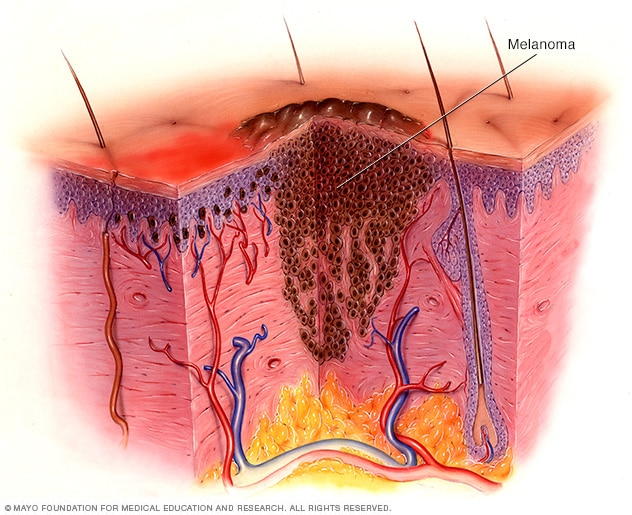

  Le cancer de la peau est une croissance anormale des cellules de la peau, c’est l’un des cancers les plus courants et malheureusement, il peut devenir mortel. La bonne nouvelle cependant, c’est que lorsqu’il est pris tôt, le dermatologue peut le traiter et l’éliminer complètement.

  Une cellule cancéreuse est maligne signifie qu’elle peut se développer et se propager à d’autres parties du corps. 
  Une cellule bénigne signifie que la tumeur peut se développer mais ne se propagera pas.

  En utilisant l’apprentissage profond et les réseaux neuronaux, nous serons en mesure de classifier les maladies cutanées bénignes et malignes, cela peut aider le médecin à diagnostiquer le cancer à un stade plus précoce.

  Dans ce travail on va essayer d'appliquer les techniques du Transfer learning, on utilisant plusieurs models pre-formés, pour avoir des modeles capable à donner une classification precises de cette maladie, en utilisant des images de la base de données ISIC.

# Classification du cancer de la peau avec les techniques de transfer learning



# Importation des bibliotheques

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob

from tqdm import tqdm_notebook

%matplotlib inline
tf.__version__

'2.4.0'

Connexion au *Drive*

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cette fonction nous permet de telecharger les images de notre base de donnée , en les convertissant à array et en fixant leurs tailles .

In [ ]:
from tqdm import tqdm
import requests
from PIL import *
import cv2 

def Dataset_loader(DIR,RESIZE):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".jpg":
            img = read(PATH)
            img = cv2.resize(img, (RESIZE,RESIZE))
            IMG.append(np.array(img)/255.)
    return IMG

benign_train = np.array(Dataset_loader('/content/drive/MyDrive/datasetskin/train/benign',224))
malign_train = np.array(Dataset_loader('/content/drive/MyDrive/datasetskin/train/malignant',224))
benign_test = np.array(Dataset_loader('/content/drive/MyDrive/datasetskin/test/benign',224))
malign_test = np.array(Dataset_loader('/content/drive/MyDrive/datasetskin/test/malignant',224))

100%|██████████| 300/300 [01:03<00:00,  4.69it/s]


Dans cette etape , on donne des labels aux images du dataset, pour qu'on puisse les afficher (chaque images avec son label)

In [ ]:
# Skin Cancer: Malignant vs. Benign
# Creation labels
benign_train_label = np.zeros(len(benign_train))
malign_train_label = np.ones(len(malign_train))
benign_test_label = np.zeros(len(benign_test))
malign_test_label = np.ones(len(malign_test))

# fusion du data 
X_train = np.concatenate((benign_train, malign_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis = 0)
X_test = np.concatenate((benign_test, malign_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malign_test_label), axis = 0)

# Mélanger les données de l'entrainement
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]


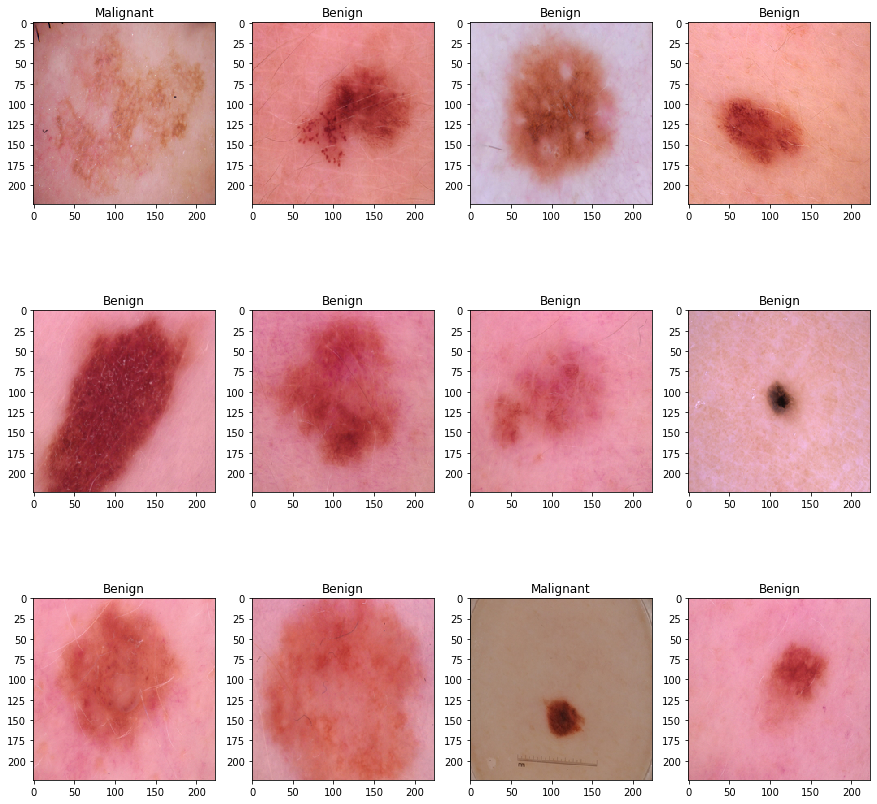

In [ ]:
# Affichage des 12 premières images de taupes
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if Y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()